# Areal Project

<div>
<img src="logo.jpg" width=150 ALIGN="left" border="20">
<h1> Starting Kit for raw data (images)</h1>
<br>This code was tested with <br>
Python 3.6.7 <br>
Created by Areal Team <br><br>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, there are many uses of image recognition spanning from robotics/drone vision to autonomous driving vehicules or face detection.
<br>
In this challenge, we will use pre-processed data, coming from landscape images. The goal is to learn to differentiate common and uncommon landscapes such as a beach, a lake or a meadow.
    Data comes from part of the data set (NWPU-RESISC45) originally used in <a href="https://arxiv.org/pdf/1703.00121.pdf?fbclid=IwAR16qo-EX_Z05ZpxvWG8F-oBU0SlnY-3BPCWBVVOGPyJcVy7BBqCKjnsvJo">Remote Sensing Image Scene Classification</a>. This data set contains 45 categories while we only kept 13 out of them.

References and credits: 
Yuliya Tarabalka, Guillaume Charpiat, Nicolas Girard for the data sets presentation.<br>
Gong Cheng, Junwei Han, and Xiaoqiang Lu, for the original article on the chosen data set.
</div>

### Requirements 

The next cell will install all the required dependencies on your computer. You should consider replacing pip with pip3 if pip is related to python2.7 on your computer, or comment it if you already have the dependencies/are running in the docker of the challenge (runnable with the name areal/codalab:pytorch if you know how to run a docker).

In [26]:
#!pip install --user -r requirements.txt

In [2]:
import numpy as np
import random
import re

In [3]:
model_dir = "sample_code_submission"
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [4]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

In [5]:
data_dir = 'sample_data'
data_name = 'Areal'

<h2 style="color:red " >Warning</h2>

<p style="font-style:italic"> In case you want to load the full data </p> 
Files being big, your computer needs to have enough space available in your RAM. It should take about 3-4GB while loading and 1.5GB in the end.

In [6]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading sample_data/Areal_train from AutoML format
Number of examples = 65
Number of features = 49152
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10        sea
11   snowberg
12    wetland
Number of classes = 13


In [7]:
data.head()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_128_126_R,pixel_128_126_G,pixel_128_126_B,pixel_128_127_R,pixel_128_127_G,pixel_128_127_B,pixel_128_128_R,pixel_128_128_G,pixel_128_128_B,target
0,145,145,121,113,113,89,73,75,53,65,...,191,164,134,196,169,139,202,175,145,desert
1,193,168,138,191,166,136,201,176,146,194,...,196,171,140,197,172,141,201,176,145,desert
2,83,86,67,65,68,49,73,78,58,78,...,115,110,91,115,107,88,141,133,114,meadow
3,16,52,48,15,51,47,15,52,45,15,...,65,83,61,58,75,56,68,85,66,river
4,60,79,47,80,99,67,62,81,51,45,...,182,197,202,121,135,144,120,137,147,mountain


In [8]:
data.describe()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_128_125_B,pixel_128_126_R,pixel_128_126_G,pixel_128_126_B,pixel_128_127_R,pixel_128_127_G,pixel_128_127_B,pixel_128_128_R,pixel_128_128_G,pixel_128_128_B
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,96.630769,102.030769,93.676923,97.230769,102.661538,94.323077,94.353846,99.584615,91.230769,93.076923,...,98.015385,99.307692,103.800000,94.523077,97.369231,101.738462,93.076923,95.800000,100.323077,91.600000
std,63.041794,52.057051,52.828765,64.983356,53.971427,54.017679,63.980815,53.380091,53.738594,64.282168,...,58.560463,63.085241,54.084194,55.020765,60.896575,50.817467,51.335389,55.726509,43.865956,43.464713
min,13.000000,14.000000,14.000000,6.000000,13.000000,12.000000,9.000000,13.000000,11.000000,11.000000,...,12.000000,10.000000,15.000000,9.000000,14.000000,19.000000,14.000000,17.000000,22.000000,18.000000
25%,53.000000,63.000000,52.000000,44.000000,64.000000,49.000000,46.000000,60.000000,48.000000,45.000000,...,60.000000,55.000000,63.000000,58.000000,53.000000,60.000000,56.000000,53.000000,64.000000,55.000000
50%,82.000000,88.000000,85.000000,80.000000,96.000000,88.000000,74.000000,87.000000,84.000000,77.000000,...,90.000000,73.000000,90.000000,74.000000,74.000000,97.000000,86.000000,76.000000,96.000000,92.000000
75%,141.000000,137.000000,135.000000,139.000000,145.000000,136.000000,136.000000,140.000000,136.000000,136.000000,...,121.000000,152.000000,141.000000,128.000000,138.000000,144.000000,130.000000,135.000000,137.000000,132.000000
max,239.000000,240.000000,245.000000,237.000000,239.000000,242.000000,239.000000,238.000000,243.000000,240.000000,...,255.000000,240.000000,249.000000,254.000000,235.000000,245.000000,254.000000,232.000000,212.000000,218.000000


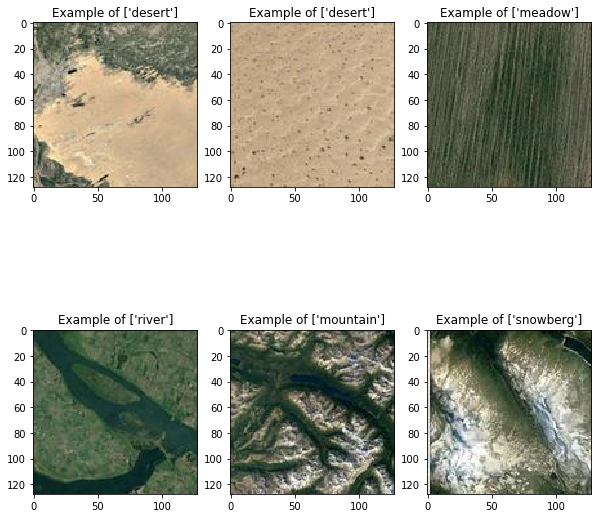

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

num_toshow = 6
fig, _axs = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.iloc[i].values[:-1].reshape(128,128,3)
    label = data.iloc[i].values[-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float) / 255)

plt.show()

In [10]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

       target
0      desert
1      desert
2      meadow
3       river
4    mountain
5    snowberg
6      meadow
7      island
8      desert
9        lake
10     desert
11      beach
12     forest
13   snowberg
14     desert
15       lake
16      cloud
17      river
18     meadow
19        sea
20      cloud
21      river
22     forest
23        sea
24     island
25      beach
26    wetland
27   snowberg
28      beach
29      cloud
..        ...
35   mountain
36  chaparral
37    wetland
38  chaparral
39  chaparral
40     meadow
41       lake
42  chaparral
43   mountain
44        sea
45      cloud
46    wetland
47       lake
48  chaparral
49   mountain
50   snowberg
51    wetland
52      river
53     meadow
54   mountain
55      beach
56      cloud
57    wetland
58        sea
59   snowberg
60     island
61     island
62       lake
63      beach
64     forest

[65 rows x 1 columns]


# Step 2 : Building a predictive model

<h2 style="color:red " >Warning</h2>

<p style="font-style:italic"> In case you want to load the full data </p> 
This time, also, still make sure that your RAM has at least 2-3GB available.

In [11]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=False, verbose=True)
print(D)

Info file found : /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_data/Areal_public.info
========= Reading sample_data/Areal_feat.type
[+] Success in  0.00 sec
========= Reading sample_data/Areal_train.data
[+] Success in  0.83 sec
========= Reading sample_data/Areal_train.solution
[+] Success in  0.00 sec
========= Reading sample_data/Areal_valid.data
[+] Success in  0.16 sec
========= Reading sample_data/Areal_valid.solution
[+] Success in  0.00 sec
========= Reading sample_data/Areal_test.data
[+] Success in  0.16 sec
========= Reading sample_data/Areal_test.solution
[+] Success in  0.00 sec
DataManager : Areal
info:
	usage = Sample dataset Areal data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 49152
	target_num = 13
	label_num = 13
	train_num = 65
	valid_num = 13
	test_num = 13
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dens

In [12]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

### Use of the baseline model

Using our BasicCNN model needs PyTorch libraries installed.

In case you have them but still encounter errors related to them, you should probably do an upgrade : 

    pip install -U torch

Our model is a simple implementation of a Convolutional Neural Network.

In [13]:
from model import BasicCNN

In [14]:
m = BasicCNN(verbose=True)
trained_model_name = model_dir + data_name

In [15]:
m.fit(X_train, Y_train)

Epoch 0 : loss = 2.571903
Epoch 1 : loss = 2.554710
Epoch 2 : loss = 2.540419
Epoch 3 : loss = 2.525594
Epoch 4 : loss = 2.509808
Epoch 5 : loss = 2.493349
Epoch 6 : loss = 2.476958
Epoch 7 : loss = 2.461299
Epoch 8 : loss = 2.446563
Epoch 9 : loss = 2.432736


In [16]:
Y_hat_train = m.predict(D.data['X_train'])
Y_hat_valid = m.predict(D.data['X_valid'])
Y_hat_test = m.predict(D.data['X_test'])

In [17]:
# m.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/Areal_test.predict
sample_result_submission/Areal_train.predict
sample_result_submission/Areal_valid.predict


# Scoring the result

Obviously, since it is made with sample_data, which has too few samples, results won't be really good

In [18]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: accuracy


In [27]:
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
if len(D.data['Y_valid']) > 0 and len(D.data['Y_test']) > 0:
    print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))

Ideal score for the accuracy metric = 1.0000
Training score for the accuracy metric = 0.4000
Valid score for the accuracy metric = 0.3077
Test score for the accuracy metric = 0.2308


## confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_hat_train)

array([[0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0]])

## cross validation

CV scores on sample_data doesn't have enough data, and so isn't meaningful.
Run it with the full data to see meaningful values.

In [21]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [22]:
scores = cross_val_score(BasicCNN(), X_train, Y_train, cv=3, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.12 (+/- 0.12)


# Submission

## Example

Example needs to have python3 installed

Test to see whether submission with ingestion program is working

In [23]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_data
Using output_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_result_submission
Using program_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/ingestion_program
Using submission_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Areal ********
************************************************
========= Reading and converting data ==========
Info file found : /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_data/Areal_public.info
========= Reading /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_data/Areal_feat.type
[+] Success in  0.00 sec
========= Reading /home/keanu/Docum

### Test scoring program

In [24]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Areal_test): accuracy(set1_score)=0.230769230769 =======
======= Set 2 (Areal_train): accuracy(set2_score)=0.400000000000 =======
======= Set 3 (Areal_valid): accuracy(set3_score)=0.307692307692 =======


# Prepare the submission

In [25]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = './sample_code_submission_' + the_date + '.zip'
sample_result_submission = './sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
./sample_code_submission_19-01-11-18-43.zip
./sample_result_submission_19-01-11-18-43.zip
